In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# prepare data

In [2]:
import pandas as pd
def getData(filename):
    chunksize = 1200000
    flag =1
    for data in pd.read_csv(filename, sep=",", chunksize=chunksize):
        while flag<2 and chunksize < 1200000:
            print(data)
        flag+=1
    print(data.head())
    print(list(data.columns.values))
    print(type(data))
    
    return data

In [3]:
import random
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.9
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

In [6]:
X_comb, y_comb, X_test, y_test = split_data(dataset)

In [7]:
print('Train data shape', X_comb.shape)
print('Test data shape', X_test.shape)

Train data shape (17317, 54)
Test data shape (1912, 54)


# Design Auto-Encoder

In [8]:
# define the number of features
ncol = X_comb.shape[1]
ncol

54

In [9]:
# Split train data into train and validation 90:10 in ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_comb, y_comb, train_size = 0.9, random_state = seed(2017))

In [10]:
### Define the encoder dimension
encoding_dim = 30

In [11]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
# encoded1 = Dense(50, activation = 'relu')(input_dim)
# encoded2 = Dense(40, activation = 'relu')(encoded1)
# encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)
encoded1 = Dense(45, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)




# Decoder Layers
# decoded1 = Dense(40, activation = 'relu')(encoded3)
# decoded2 = Dense(50, activation = 'relu')(decoded1)
# decoded8 = Dense(ncol, activation = 'sigmoid')(decoded2)
decoded1 = Dense(45, activation = 'relu')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1)



# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy')

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 54)]              0         
                                                                 
 dense (Dense)               (None, 45)                2475      
                                                                 
 dense_1 (Dense)             (None, 30)                1380      
                                                                 
 dense_2 (Dense)             (None, 45)                1395      
                                                                 
 dense_3 (Dense)             (None, 54)                2484      
                                                                 
Total params: 7734 (30.21 KB)
Trainable params: 7734 (30.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
X_train_arr=X_train.to_numpy()
# X_train_arr=X_train_arr.reshape(X_train_arr.shape[0],X_train_arr.shape[1],1)
X_train_arr.shape

(15585, 54)

In [14]:
X_test_arr=X_test.to_numpy()
# X_test_arr=X_test_arr.reshape(X_test_arr.shape[0],X_test_arr.shape[1],1)
X_test_arr.shape

(1912, 54)

In [15]:
# Train Auto Encoder
autoencoder.fit(X_train_arr, X_train_arr, epochs = 10, batch_size = 32, 
                shuffle = False, validation_data = (X_test_arr, X_test_arr))

Epoch 1/10


488/488 [==============================] - 2s 2ms/step - loss: 25.7235 - val_loss: 25.6775
Epoch 2/10
488/488 [==============================] - 1s 2ms/step - loss: 25.6746 - val_loss: 25.6246
Epoch 3/10
488/488 [==============================] - 1s 1ms/step - loss: 25.6180 - val_loss: 25.5646
Epoch 4/10
488/488 [==============================] - 1s 1ms/step - loss: 25.5545 - val_loss: 25.4974
Epoch 5/10
488/488 [==============================] - 1s 1ms/step - loss: 25.4830 - val_loss: 25.4213
Epoch 6/10
488/488 [==============================] - 1s 1ms/step - loss: 25.4014 - val_loss: 25.3337
Epoch 7/10
488/488 [==============================] - 1s 1ms/step - loss: 25.3057 - val_loss: 25.2287
Epoch 8/10
488/488 [==============================] - 1s 1ms/step - loss: 25.1880 - val_loss: 25.0965
Epoch 9/10
488/488 [==============================] - 1s 2ms/step - loss: 25.0361 - val_loss: 24.9229
Epoch 10/10
488/488 [==============================] - 1s 1ms/step - loss: 24.8346 - val_loss

# Encoder

In [16]:
# Use Encoder level to reduce dimension of train and test data

encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))
encoded_input


<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'input_2')>

In [17]:
# Predict the new train and test data using Encoder

encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_') # column level are prefix

encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')

60/60 [==============================] - 0s 847us/step


In [18]:
encoded_X = pd.DataFrame(encoder.predict(X))
encoded_X = encoded_X.add_prefix('feature_')

601/601 [==============================] - 1s 812us/step


In [19]:
encoded_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,0.204300,0.321397,0.113794,0.372049,0.000000,0.000000,0.090391,0.0,0.202624,0.000000,...,0.381788,0.0,0.222355,0.000000,0.106510,0.000000,0.000000,0.000000,0.0,0.0
1,0.087226,0.432947,0.000000,0.283922,0.000000,0.000000,0.000000,0.0,0.000000,0.220458,...,0.466670,0.0,0.273561,0.012996,0.000000,0.128778,0.050771,0.000000,0.0,0.0
2,0.000000,0.256681,0.000000,0.082119,0.069201,0.000000,0.000000,0.0,0.000000,0.278083,...,0.539246,0.0,0.490144,0.129457,0.310576,0.000000,0.363932,0.000000,0.0,0.0
3,0.108678,0.297535,0.000000,0.249656,0.000000,0.027944,0.089239,0.0,0.000000,0.000000,...,0.462010,0.0,0.245632,0.060301,0.161764,0.000000,0.288373,0.000000,0.0,0.0
4,0.048430,0.362034,0.412581,0.106168,0.004587,0.056550,0.000000,0.0,0.000000,0.290070,...,0.689972,0.0,0.478559,0.271357,0.143056,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15580,0.000000,0.134720,0.376474,0.000000,0.287587,0.210677,0.000000,0.0,0.000000,0.015738,...,0.668616,0.0,0.502715,0.156058,0.244428,0.000000,0.101250,0.149570,0.0,0.0
15581,0.118693,0.278983,0.000000,0.175455,0.000000,0.050421,0.000000,0.0,0.000000,0.070023,...,0.441462,0.0,0.246216,0.068570,0.000000,0.101888,0.289805,0.000000,0.0,0.0
15582,0.000000,0.297222,0.361981,0.000000,0.242336,0.134125,0.000000,0.0,0.000000,0.142449,...,0.455845,0.0,0.417462,0.295446,0.072133,0.000000,0.207776,0.184497,0.0,0.0
15583,0.054161,0.133904,0.167346,0.000000,0.338827,0.172042,0.000000,0.0,0.000000,0.000000,...,0.750630,0.0,0.410826,0.136579,0.049351,0.000000,0.679719,0.000000,0.0,0.0


# store the compressed data in pickle

In [20]:
import pickle

pickle.dump(encoded_train, open("encoded_train.pkl", "wb"))
pickle.dump(encoded_test, open("encoded_test.pkl", "wb"))

In [21]:
pickle.dump(encoded_X, open("encoded_X.pkl", "wb"))

In [22]:
pickle.dump(encoder,open("Encoder.pkl","wb"))

# tune SVC

In [23]:
# train the model with random parameter
from sklearn.svm import SVC

model_SVC = SVC(
        C=8.75,#Regularization parameter
        kernel="rbf", # maximum number of estimators at which boosting is terminated
        gamma=0.4,
        tol=0.483,
        decision_function_shape='ovo',
        
     )

model_SVC.fit(encoded_train, y_train)

SVC(C=8.75, decision_function_shape='ovo', gamma=0.4, tol=0.483)

In [24]:
# Finding mean absolute error
preds = model_SVC.predict(encoded_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.7301255230125523

In [25]:
# Defining the best parameter with optuna
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(encoded_X)
target_train_tunned= np.array(y)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_SVC(trial):

 for train_index, val_index in (skf.split(encoded_X,y)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        
    param = {
        'C':trial.suggest_float("C",0,10), #For regularization    
        'kernel':trial.suggest_categorical('kernel',["linear", "poly", "rbf", "sigmoid"]),
        'degree':trial.suggest_int('degree',1,10),
        'gamma':trial.suggest_float('gamma',0,1),
        # 'tol':trial.suggest_float('tol',0,5),
        # 'coef0':trial.suggest_float('coed0',0,3),
        'decision_function_shape':trial.suggest_categorical('decision_function_shape',['ovo','ovr']),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model= SVC(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X

      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [26]:
# this is the main optuna for optimizing a object-->"objective"
import optuna

study_SVC = optuna.create_study(direction='minimize',study_name="SVC_tunning")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-02-06 21:17:39,737] A new study created in memory with name: SVC_tunning


In [27]:

study_SVC.optimize(objective_SVC, n_trials=10) 
print('Number of finished trials:', len(study_SVC.trials))
print('Best trial:', study_SVC.best_trial.params)

[I 2024-02-06 21:18:49,754] Trial 0 finished with value: 1.4850486244734515 and parameters: {'C': 2.221235489664277, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 0.3979894246378155, 'decision_function_shape': 'ovr', 'random_state': 5}. Best is trial 0 with value: 1.4850486244734515.
[I 2024-02-06 21:19:36,866] Trial 1 finished with value: 1.0612616360705185 and parameters: {'C': 4.254694079937726, 'kernel': 'linear', 'degree': 1, 'gamma': 0.2556866162422985, 'decision_function_shape': 'ovo', 'random_state': 0}. Best is trial 1 with value: 1.0612616360705185.
[I 2024-02-06 21:20:37,620] Trial 2 finished with value: 0.8850694263872276 and parameters: {'C': 7.419478061172072, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.4490570815336288, 'decision_function_shape': 'ovo', 'random_state': 1}. Best is trial 2 with value: 0.8850694263872276.
[I 2024-02-06 21:21:39,597] Trial 3 finished with value: 0.8928701440532529 and parameters: {'C': 7.495812493486943, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.3

Number of finished trials: 10
Best trial: {'C': 7.58936837701599, 'kernel': 'poly', 'degree': 7, 'gamma': 0.928441476289657, 'decision_function_shape': 'ovo', 'random_state': 2}


In [41]:
fig_study = optuna.visualization.plot_parallel_coordinate(study_SVC, params=["C", "kernel","degree","gamma","decision_function_shape","random_state"])


In [28]:
#evaluate the trial
print("Number of finished trials: ", len(study_SVC.trials))
print("Best trial:")
trial = study_SVC.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  10
Best trial:
  Value:  0.54631026054397
  Params: 
    C: 7.58936837701599
    kernel: poly
    degree: 7
    gamma: 0.928441476289657
    decision_function_shape: ovo
    random_state: 2


# fit the SVM model

In [29]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_SVC = np.array(encoded_train)
target_train_SVC = np.array(y_train)

test_SVC = np.array(encoded_test) # or test_Ada = np.array(X)


test_preds_SVC = np.zeros((len(test_SVC)))
oof_preds_SVC = np.zeros((len(train_SVC)))

for train_index, val_index in tqdm(skf.split(encoded_train,y_train), total=5):
    train_X, valid_X = train_SVC[train_index], train_SVC[val_index]
    train_y, valid_y = target_train_SVC[train_index], target_train_SVC[val_index]
    svc_params = study_SVC.best_trial.params
    model_SVC_2 = SVC(**svc_params)
    model_SVC_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_SVC_2.predict(valid_X)
    oof_preds_SVC[val_index] = preds
    # for test accuracy
    preds = model_SVC_2.predict(test_SVC)
    test_preds_SVC += (preds)/5
print(np.abs(oof_preds_SVC-target_train_SVC).mean())

100%|██████████| 5/5 [01:23<00:00, 16.65s/it]

0.46750080205325634


In [30]:
from sklearn.metrics import accuracy_score
# valid_Acc_SVC=accuracy_score(target_train,oof_preds)
# print(valid_Acc_SVC)
target_test=np.array(y_test)
# another technique for calculate test accuracy
test_Acc_SVC=accuracy_score(target_test,test_preds_SVC.round())
print(test_Acc_SVC)

0.7447698744769874


In [31]:
#validation accuracy
valid_Acc=accuracy_score(target_train_SVC,oof_preds_SVC)
print(valid_Acc)

0.7700994546037857


In [32]:
# train accuracy
train_Acc=model_SVC_2.score(encoded_train,y_train)
print(train_Acc)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8062239332691691


In [33]:
# test_accuracy
test_Acc=model_SVC_2.score(encoded_test,y_test)
print(test_Acc)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.7667364016736402


# Evaluation

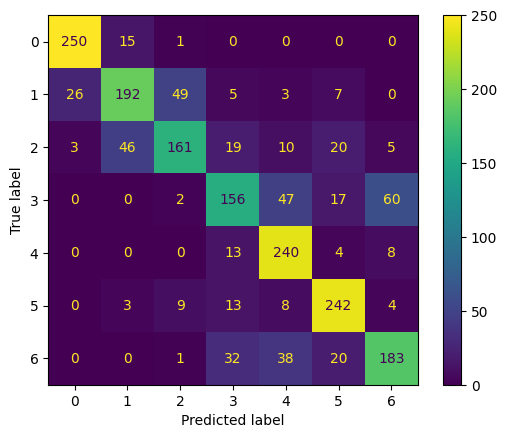

In [34]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_SVC.round())
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.pink)


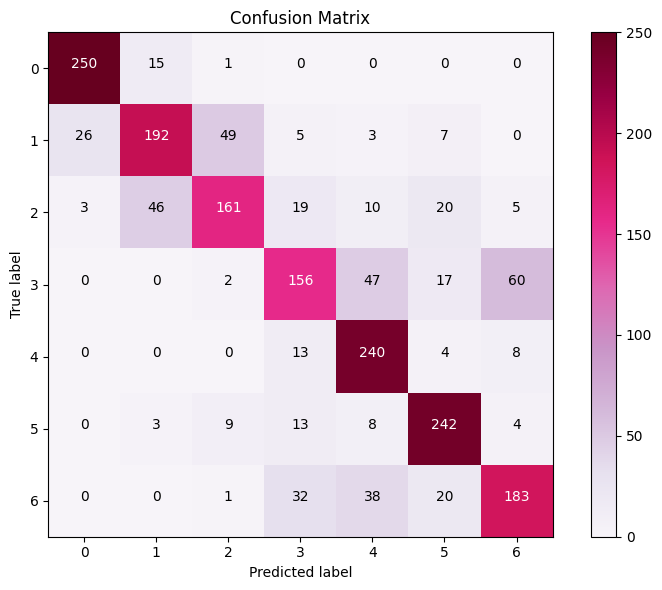

In [35]:
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding ticks and labels
# tick_marks = np.arange(len(cm))
# plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','class 5','class 6'])
# plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()